In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Basis function

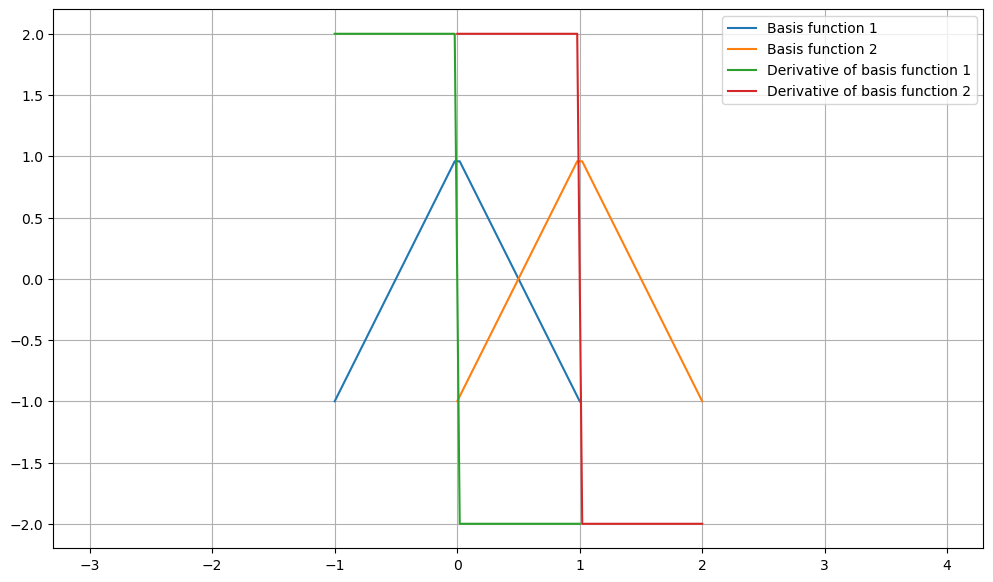

In [2]:
x = np.linspace(-1, 1)
phi = np.where(x > 0, 1 - 2 * x, 2 * x + 1)
dphi = np.where(x > 0, -2, 2)
plt.figure(figsize=(12, 7))
plt.plot(x, phi, label='Basis function 1')
plt.plot(x + 1, phi, label='Basis function 2')
plt.plot(x, dphi, label='Derivative of basis function 1')
plt.plot(x + 1, dphi, label='Derivative of basis function 2')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

# FEM Operators

$\mathcal{S}_{ij} = - \int (\nabla \varphi_i, \nabla \varphi_j) dx $

$\mathcal{M}_{ij} = \int  \varphi_i \varphi_j dx .$

$\begin{cases} &  u^{''} = f \\ & u |_{\partial \Omega} = 0 \end{cases}$

$\Omega = [0, 1]$

In [3]:
n = 128 # num of nodes
a = 0
b = 1
h = (b - a) / (n - 1) # mesh step

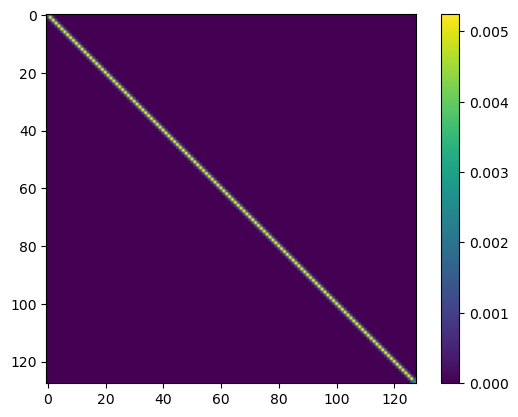

In [4]:
M_diag = [2*h/3] * n
M_diag[0]  = h/3
M_diag[-1] = h/3

M_diag_upper = [h/6] * (n - 1)
M_diag_lower = [h/6] * (n - 1)

M = sp.sparse.diags([M_diag_lower, M_diag, M_diag_upper], (-1, 0, 1), format='csr')
plt.imshow(M.toarray())
plt.colorbar()
plt.show()

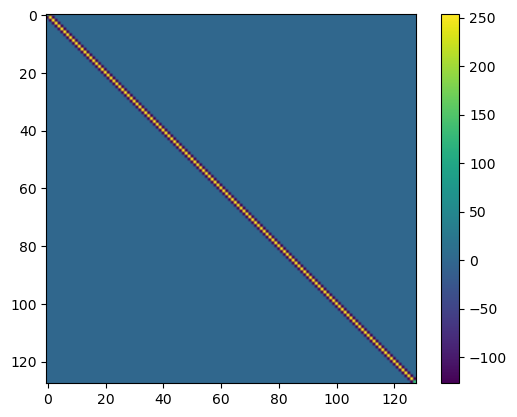

In [5]:
S_diag = [2/h] * n
S_diag[0]  = 1/h
S_diag[-1] = 1/h

S_diag_upper = [-1/h] * (n - 1)
S_diag_lower = [-1/h] * (n - 1)

S = sp.sparse.diags([S_diag_lower, S_diag, S_diag_upper], (-1, 0, 1), format='csr')
plt.imshow(S.toarray())
plt.colorbar()
plt.show()

In [6]:
E = sp.sparse.diags([np.ones(n)], (0,), format='csr')

/home/egor/anaconda3/envs/play/lib/python3.13/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
/home/egor/anaconda3/envs/play/lib/python3.13/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


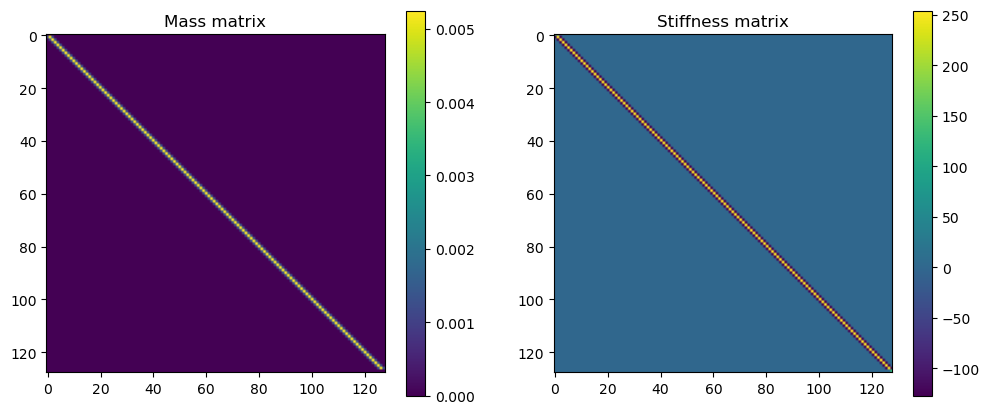

In [7]:
# Apply boundary conditions
M[[0, -1], :] = 0; M.eliminate_zeros()
S[[0, -1], :] = 0; S.eliminate_zeros()
S[0, 0]   = 1/h
S[-1, -1] = 1/h

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
im0 = axs[0].imshow(M.toarray())
axs[0].set_title("Mass matrix")
plt.colorbar(im0, ax=axs[0])
im1 = axs[1].imshow(S.toarray())
axs[1].set_title("Stiffness matrix")
plt.colorbar(im1, ax=axs[1])
plt.show()

In [8]:
x = np.linspace(a, b, num=n) # nodes

$f = \sin (2 \pi x)$

In [9]:
analytic = lambda x: -np.sin(4. * np.pi * x) / (4. * np.pi)**2
f = np.sin(4. * np.pi * x)

In [10]:
solution = -sp.sparse.linalg.spsolve(S, M @ f)
analytic_solution = analytic(x)

Error: 0.0008154893688567125


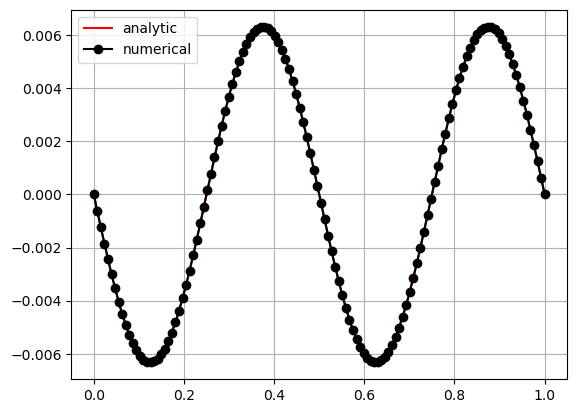

In [11]:
plt.plot(np.linspace(a, b), analytic(np.linspace(a, b)), 'r-', label='analytic')
plt.plot(x, solution, 'ko-', label='numerical')
print("Error:", np.linalg.norm(analytic_solution - solution) / np.linalg.norm(analytic_solution))
plt.grid()
plt.legend()
plt.show()

# 2D

In [12]:
S_2D = sp.sparse.kron(S, E) + sp.sparse.kron(E, S)
M_2D = sp.sparse.kron(M, M)

In [13]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# im0 = axs[0].imshow(S_2D.toarray())
# axs[0].set_title("Mass matrix")
# plt.colorbar(im0, ax=axs[0])
# im1 = axs[1].imshow(M_2D.toarray())
# axs[1].set_title("Stiffness matrix")
# plt.colorbar(im1, ax=axs[1])
# plt.show()

In [14]:
X, Y = np.meshgrid(x, x, indexing='ij')
X, Y = X.flatten(), Y.flatten()

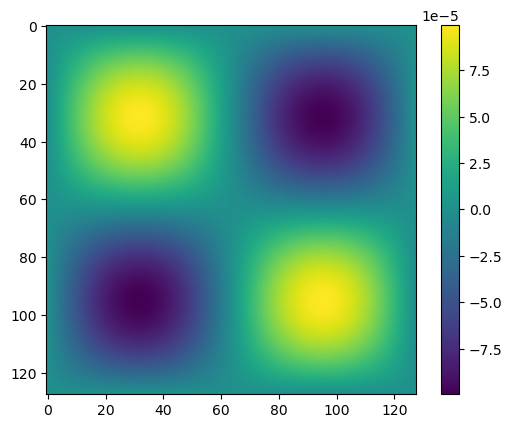

In [15]:
f = np.sin(2. * np.pi * X) * np.sin(2. * np.pi * Y)
solution = -sp.sparse.linalg.spsolve(-S_2D, M_2D @ f)
plt.imshow(solution.reshape((n, n)))
plt.colorbar()
plt.show()

# 2D

In [16]:
S = sp.sparse.diags([S_diag_lower, S_diag, S_diag_upper], (-1, 0, 1), format='csr')
M = sp.sparse.diags([M_diag_lower, M_diag, M_diag_upper], (-1, 0, 1), format='csr')
E = sp.sparse.diags([np.ones(n)], (0,), format='csr')

S_2D = sp.sparse.kron(S, E) + sp.sparse.kron(E, S)
M_2D = sp.sparse.kron(M, M)

In [17]:
X, Y = np.meshgrid(x, x, indexing='ij')
X, Y = X.flatten(), Y.flatten()

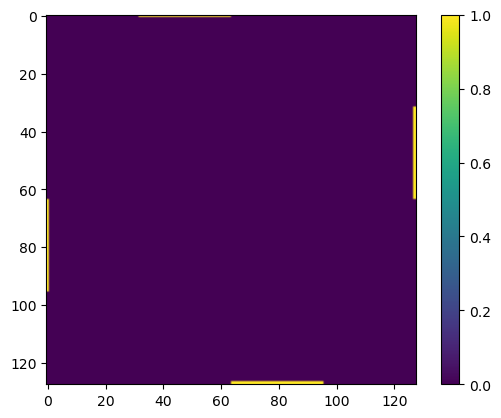

In [18]:
bc = np.zeros((n, n))

# bc[0, :] = 1
# bc[:-n//2, -1] = 1
# bc[:-n//2,  0] = 1

bc[0,  n//4:-n//2] = 1
bc[-1, n//2:-n//4] = 1
bc[n//2:-n//4,  0] = 1
bc[n//4:-n//2, -1] = 1

plt.imshow(bc)
plt.colorbar()
plt.show()

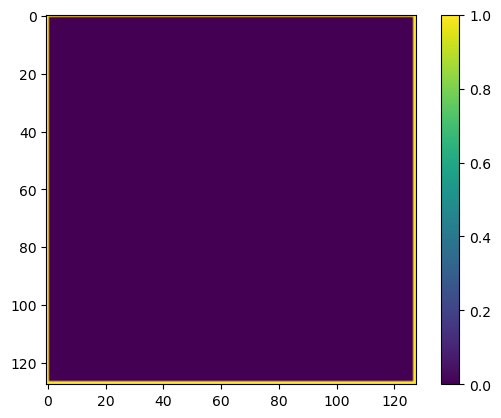

In [19]:
mask = np.zeros((n, n))
mask[ 0, :] = 1
mask[-1, :] = 1
mask[:,  0] = 1
mask[:, -1] = 1

plt.imshow(mask)
plt.colorbar()
plt.show()

In [20]:
Mask_boundary = sp.sparse.diags([(np.ones((n, n)) - mask).flatten()], (0,), format='csr')
Mask = sp.sparse.diags([(np.ones((n, n)) - mask + bc).flatten()], (0,), format='csr')

In [21]:
S_2D = Mask_boundary @ S_2D + (sp.sparse.eye(n**2) - Mask_boundary)
S_2D.eliminate_zeros()

M_2D = Mask @ M_2D
M_2D.eliminate_zeros()

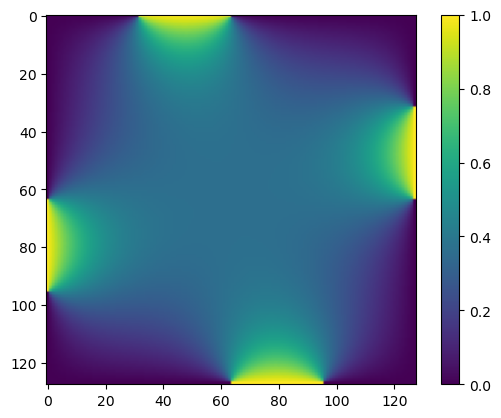

In [22]:
f = 0. * X # np.sin(np.pi * X) * np.sin(np.pi * Y)
f = M_2D @ f + 1 * (bc).flatten()
solution = -sp.sparse.linalg.spsolve(-S_2D, f)
plt.imshow(solution.reshape((n, n)))
plt.colorbar()
plt.show()